In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('C:\\Users\\zainabosamah\\Downloads\\colon-dataset-processed.csv')

# Check for class imbalance
print(df['Class'].value_counts(normalize=True))

# Splitting the dataset
X = df.drop('Class', axis=1)
y = df['Class']

# Scale the 'Age' feature
scaler = StandardScaler()
X['Age'] = scaler.fit_transform(X[['Age']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomForest with potential class imbalance handling
clf = RandomForestClassifier(random_state=42, class_weight='balanced')

grid_search = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best estimator from grid search
best_clf = grid_search.best_estimator_

# Prediction
y_pred = best_clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Feature Importance
feature_importances = best_clf.feature_importances_
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})


Class
diagnosed    0.565217
healthy      0.434783
Name: proportion, dtype: float64
Fitting 3 folds for each of 108 candidates, totalling 324 fits


Accuracy: 86.96%


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV

# Load the dataset
df = pd.read_csv('C:\\Users\\zainabosamah\\Downloads\\colon-dataset-processed.csv')

# Check for class imbalance
print(df['Class'].value_counts(normalize=True))

# Splitting the dataset
X = df.drop('Class', axis=1)
y = df['Class']

# Scale the 'Age' feature
scaler = StandardScaler()
X['Age'] = scaler.fit_transform(X[['Age']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature selection using RFECV
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
selector = RFECV(estimator=clf, step=1, cv=3)
selector = selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

print(f"Number of features selected: {selector.n_features_}")

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_selected, y_train)

# Get the best estimator from grid search
best_clf = grid_search.best_estimator_

# Prediction
y_pred = best_clf.predict(X_test_selected)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Feature Importance
feature_importances = best_clf.feature_importances_
importances_df = pd.DataFrame({
    'Feature': X.columns[selector.support_],
    'Importance': feature_importances
})
print(importances_df.sort_values(by="Importance", ascending=False))


Class
diagnosed    0.565217
healthy      0.434783
Name: proportion, dtype: float64
Number of features selected: 1
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Accuracy: 86.96%
  Feature  Importance
0     Age         1.0


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV
from imblearn.under_sampling import RandomUnderSampler

# Load the dataset
df = pd.read_csv('C:\\Users\\zainabosamah\\Downloads\\colon-dataset-processed.csv')

# Check for class imbalance
print(df['Class'].value_counts(normalize=True))

# Splitting the dataset
X = df.drop('Class', axis=1)
y = df['Class']

# Scale the 'Age' feature
scaler = StandardScaler()
X['Age'] = scaler.fit_transform(X[['Age']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
print(y_train_resampled.value_counts(normalize=True))

# Feature selection using RFECV
clf = RandomForestClassifier(random_state=42)
selector = RFECV(estimator=clf, step=1, cv=3)
selector = selector.fit(X_train_resampled, y_train_resampled)
X_train_selected = selector.transform(X_train_resampled)
X_test_selected = selector.transform(X_test)

print(f"Number of features selected: {selector.n_features_}")

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_selected, y_train_resampled)

# Get the best estimator from grid search
best_clf = grid_search.best_estimator_

# Prediction
y_pred = best_clf.predict(X_test_selected)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Feature Importance
feature_importances = best_clf.feature_importances_
importances_df = pd.DataFrame({
    'Feature': X.columns[selector.support_],
    'Importance': feature_importances
})
print(importances_df.sort_values(by="Importance", ascending=False))




Class
diagnosed    0.565217
healthy      0.434783
Name: proportion, dtype: float64
Class
diagnosed    0.5
healthy      0.5
Name: proportion, dtype: float64
Number of features selected: 5
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Accuracy: 86.96%
      Feature  Importance
0         Age    0.733567
1  p16540_C/C    0.091946
2    GAL3_C/A    0.064040
3    GAL3_C/C    0.055987
4    TIM1_G/C    0.054459


In [ ]:
#save the model
import pickle
filename = 'Models/Xgboost_model.pkl'
pickle.dump(best_clf, open(filename, 'wb'))

VISUALIZE A CONFUSION MATRIX

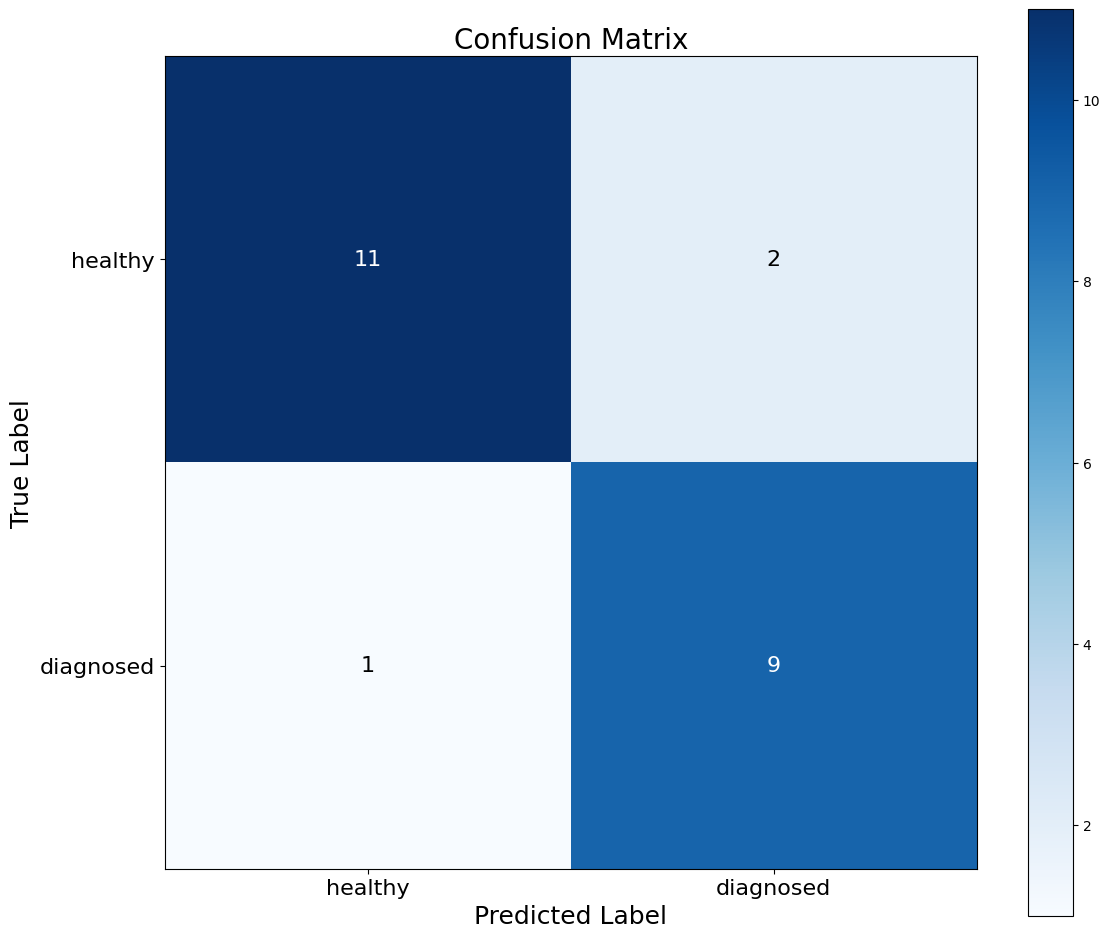

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Enhanced confusion matrix plotting
fig, ax = plt.subplots(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred)  # y_pred is already computed from your RandomForest model

# Display the heatmap
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Ensure labels are correct (change this if needed based on your data labels)
ax.set(xticks=np.arange(cm.shape[1]), 
       yticks=np.arange(cm.shape[0]),
       xticklabels=['healthy', 'diagnosed'], 
       yticklabels=['healthy', 'diagnosed'],
       title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label")
ax.title.set_fontsize(20)
ax.xaxis.label.set_fontsize(18)
ax.yaxis.label.set_fontsize(18)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)

# Loop over data dimensions and create text annotations with increased font size
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center", 
                color="white" if cm[i, j] > cm.max() / 2. else "black", fontsize=16)

plt.tight_layout()
plt.show()
